### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

### Loading the dataset

In [4]:
# load dataset
from sklearn import datasets
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

### Exploratory Data Analysis (EDA)

In [6]:
# Get keys of 'digits' data

print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [7]:
# print out data
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
# print out target classes
print(digits.target)

[0 1 2 ... 8 9 8]


In [10]:
# print out target classes names
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# print out description of digits dataset
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [12]:
# isolate digits data - matrix of features
digits_data = digits.data
digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits_data.shape

(1797, 64)

In [14]:
# isolate target classes - dependent variable vector
digits_target = digits.target
digits_target

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
# print the number of unique labels
number_digits = len(np.unique(digits.target))
print(number_digits)

10


In [17]:
# isolate the OCR images
# these are of size 8 x 8, gray scale images
digits_images = digits.images

In [18]:
print(digits_images.shape)

(1797, 8, 8)


### Visualizing data images using matplotlib

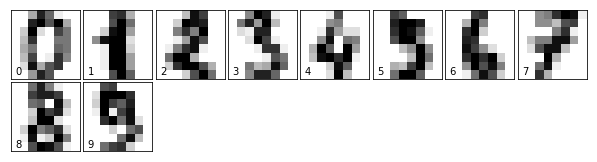

In [21]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(10):
    # initializing subplots, add subplot in gride of 8 x 8, at i-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    
    # display image at i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label image with a target value
    ax.text(0, 7, str(digits.target[i]))
    
# show the plot
plt.show()

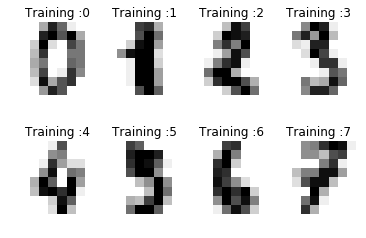

In [26]:
# alternative method
# join images and target labels into a list

images_and_labels = list(zip(digits.images, digits.target))

# for each element contained in the list
for index, (image, label) in enumerate(images_and_labels[:8]):
    
    # initializing subplot of 2 x 4 at i+1-th position
    plt.subplot(2, 4, index+1)
    
    # do not plot any axes
    plt.axis('off')
    
    # display images in the all subplots
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation = 'nearest')
    
    # add some title to every subplot
    plt.title('Training :' + str(label))
    
# show the plot
plt.show()